In [1]:
import numpy as np
import sys
from google.colab import drive

import tensorflow as tf                  # TensorFlow
import tensorflow.nn as nn               # nn contains useful neural network functions like softmax, relu, tanh
from tensorflow import keras             # high level API for TensorFlow
import tensorflow.keras.layers as layers # contains layers like RNN, CNN, LSTM

from sklearn.model_selection import train_test_split

drive.mount('/content/gdrive')
sys.path.insert(0,'/content/gdrive/MyDrive/C247_NNDL_Project/helper_functions')
from load import *

Mounted at /content/gdrive


In [2]:
data = load_data(only_subject_1 = True, one_hot_ylabel=False, CNN_greyscale = False)

X_train_valid: (237, 1000, 22)
y_train_valid: (237,)
X_test: (50, 1000, 22)
y_test: (50,)


In [69]:
def preprocess(X, y, sub_sample=2, noise=True, noise_var=0.5, filter=True, max_pool=True, avg_pool=True):
  X = X[:,0:(500+500%sub_sample),:]
  X_aug = X[:, 0::sub_sample,:]
  y_aug = y

  for i in range(sub_sample-1):
    print(i)
    X_sub = X[:, i::sub_sample,:]
    X_aug = np.vstack((X_aug, X_sub))
    y_aug = np.hstack((y_aug, y))

  if max_pool:
    X_aug = np.vstack((X_aug, np.max(X.reshape(X.shape[0], -1, sub_sample, X.shape[2]), axis=2)))
    y_aug = np.hstack((y_aug, y))

  if avg_pool:
    X_aug = np.vstack((X_aug, np.mean(X.reshape(X.shape[0], -1, sub_sample, X.shape[2]), axis=2)))
    y_aug = np.hstack((y_aug, y))

  if noise:
    X_aug = X_aug + np.random.normal(0.0, noise_var, X_aug.shape)

  return X_aug, y_aug

In [24]:
import matplotlib.pyplot as plt

(237, 1000, 22)
(237,)
0
1
2
(1422, 125, 22)
(1422,)


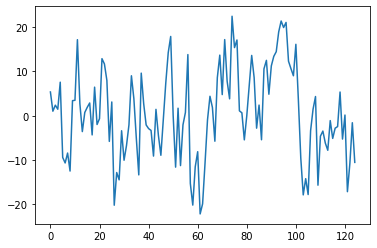

In [68]:
print(data['X_train_valid'].shape)
print(data['y_train_valid'].shape)
X_train_valid, y_train_valid = preprocess(data['X_train_valid'], data['y_train_valid'], sub_sample=4)
print(X_train_valid.shape)
print(y_train_valid.shape)
plt.plot(X_train_valid[237*1, :,0])